# Исследование объявлений о продаже квартир


Импортируем библиотеки

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pprint
import os

from pymystem3 import Mystem
from collections import Counter

In [14]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

Посмотрим на данные

In [15]:
pth1 = 'real_estate_data.csv'
pth2 = '/datasets/real_estate_data.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1, sep='\t')
elif os.path.exists(pth2):
    df = pd.read_csv(pth2, sep='\t')
else:
    print('Something is wrong')

df.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


In [16]:
df.tail(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23669,8,"3,000,000.00",34.10,2017-11-10T00:00:00,1,NaN,9.00,17.00,3,NaN,False,False,9.00,1.00,Колпино,"24,687.00","30,473.00",0.00,NaN,1.00,741.00,74.00
23670,9,"2,450,000.00",45.60,2018-02-08T00:00:00,1,2.80,9.00,NaN,2,NaN,False,False,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23671,3,"3,450,000.00",35.30,2017-04-14T00:00:00,1,2.50,9.00,17.50,4,False,False,False,7.50,2.00,Санкт-Петербург,"21,435.00","15,261.00",1.00,334.00,1.00,232.00,21.00
23672,5,"3,000,000.00",30.80,2016-06-08T00:00:00,1,NaN,5.00,16.10,3,NaN,False,False,6.30,NaN,Санкт-Петербург,"44,614.00","14,193.00",2.00,258.00,0.00,NaN,808.00
23673,9,"3,100,000.00",23.00,2018-03-19T00:00:00,1,2.80,9.00,12.60,1,NaN,False,False,5.00,2.00,Санкт-Петербург,"11,813.00","11,881.00",1.00,262.00,1.00,442.00,41.00
23674,10,"5,950,000.00",56.00,2019-03-05T00:00:00,3,NaN,8.00,32.10,3,NaN,False,False,8.50,NaN,Санкт-Петербург,"32,139.00","9,217.00",0.00,NaN,2.00,303.00,NaN
23675,8,"3,550,000.00",39.50,2016-10-03T00:00:00,1,NaN,16.00,19.00,13,NaN,False,False,8.50,NaN,Санкт-Петербург,"25,740.00","14,951.00",0.00,NaN,0.00,NaN,721.00
23676,19,"3,550,000.00",36.40,2016-06-08T00:00:00,1,NaN,16.00,14.90,13,NaN,False,False,9.30,0.00,Санкт-Петербург,"32,228.00","11,884.00",1.00,701.00,0.00,NaN,70.00
23677,8,"2,450,000.00",35.00,2018-10-26T00:00:00,1,2.60,5.00,18.00,4,NaN,False,False,9.60,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,28.00
23678,10,"3,500,000.00",43.00,2016-05-19T00:00:00,2,2.50,3.00,26.10,2,False,False,False,4.90,1.00,Пушкин,"15,823.00","27,977.00",0.00,NaN,1.00,"1,134.00",252.00


In [20]:
df.sample(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17681,14,"3,850,000.00",45.20,2019-03-26T00:00:00,2,2.56,5.00,30.10,5,NaN,False,False,6.80,NaN,Санкт-Петербург,"18,233.00","16,034.00",0.00,NaN,0.00,NaN,18.00
6987,7,"4,200,000.00",43.30,2018-11-18T00:00:00,2,NaN,5.00,NaN,2,NaN,False,False,NaN,NaN,посёлок Левашово,"52,693.00","25,727.00",0.00,NaN,0.00,NaN,61.00
8557,11,"4,280,000.00",40.00,2016-05-09T00:00:00,1,2.70,25.00,17.00,14,NaN,False,False,10.00,0.00,Санкт-Петербург,"7,711.00","13,845.00",1.00,"1,326.00",0.00,NaN,222.00
650,4,"1,750,000.00",58.10,2016-02-02T00:00:00,3,2.60,4.00,41.50,1,False,False,False,6.50,0.00,Волосово,NaN,NaN,NaN,NaN,NaN,NaN,605.00
19224,8,"4,250,000.00",57.00,2017-11-24T00:00:00,2,2.70,18.00,35.00,16,NaN,False,False,12.00,1.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,44.00
11527,17,"3,290,000.00",48.50,2018-07-29T00:00:00,4,2.50,5.00,37.00,4,NaN,False,False,6.00,NaN,Колпино,"24,703.00","30,489.00",0.00,NaN,1.00,619.00,148.00
8232,0,"7,750,000.00",40.90,2016-07-04T00:00:00,1,3.00,10.00,17.43,3,NaN,False,False,12.85,2.00,Санкт-Петербург,"32,551.00","4,599.00",2.00,630.00,0.00,NaN,64.00
5643,17,"4,100,000.00",44.00,2019-03-28T00:00:00,2,2.60,5.00,28.00,1,NaN,False,False,6.00,NaN,Санкт-Петербург,"42,480.00","8,887.00",2.00,591.00,0.00,NaN,NaN
3473,9,"4,300,000.00",74.00,2016-02-18T00:00:00,3,NaN,5.00,48.00,4,NaN,False,False,9.00,0.00,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,169.00
2013,8,"3,650,000.00",31.00,2018-08-17T00:00:00,1,2.50,9.00,16.00,8,NaN,False,False,8.00,NaN,Санкт-Петербург,"45,756.00","14,755.00",1.00,553.00,0.00,NaN,7.00


In [21]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [23]:
df.duplicated().sum()

0

Дубликатов вероятно нет. Возможно будут, если время отличается, а остальное — нет.

# Выводы

Проблемы, которые возникли:

1. Отсутствуют значения либо много значений
2. Нехорошо названы столбцы
3. Некорректные типы данных
4. Группировка столбцов рандомная
5. Неодинаковый регистр в названии столбцов
6. Непонятны некоторые обозначения, например,что такое "апартаменты"?

# Обработка данных

Приведение названия столбцов и признаков в удобную форму.

In [24]:
df.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

Переименуем столбцы

In [25]:
# Переименуем столбы
cols = ['total_images',
        'last_price',
        'total_area_m2',
        'first_day_exposition',
        'number_of_rooms',
        'ceiling_height_m',
        'total_floors_in_house',
        'living_area_m2',
        'floor',
        'is_apartment',
        'is_studio',
        'is_open_plan',
        'kitchen_area_m2',
        'number_of_balconies',
        'town_name',
        'nearest_airport_distance_m',
        'city_center_distance_m',
        'parks_numbers_within_3km',
        'nearest_park_distance_m',
        'ponds_number_within_3km',
        'nearest_pond_distance_m',
        'days_exposition']
df.set_axis(cols, axis='columns', inplace=True)

Посмотрим новые названия столбцов

In [26]:
df.columns.tolist()

['total_images',
 'last_price',
 'total_area_m2',
 'first_day_exposition',
 'number_of_rooms',
 'ceiling_height_m',
 'total_floors_in_house',
 'living_area_m2',
 'floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'kitchen_area_m2',
 'number_of_balconies',
 'town_name',
 'nearest_airport_distance_m',
 'city_center_distance_m',
 'parks_numbers_within_3km',
 'nearest_park_distance_m',
 'ponds_number_within_3km',
 'nearest_pond_distance_m',
 'days_exposition']

In [27]:
df.isnull().sum().sort_values()

total_images                      0
is_open_plan                      0
floor                             0
number_of_rooms                   0
is_studio                         0
total_area_m2                     0
last_price                        0
first_day_exposition              0
town_name                        49
total_floors_in_house            86
living_area_m2                 1903
kitchen_area_m2                2278
days_exposition                3181
ponds_number_within_3km        5518
parks_numbers_within_3km       5518
city_center_distance_m         5519
nearest_airport_distance_m     5542
ceiling_height_m               9195
number_of_balconies           11519
nearest_pond_distance_m       14589
nearest_park_distance_m       15620
is_apartment                  20924
dtype: int64

Есть пропуски, но некоторую информацию могли не заполнять или сведений не было (не так важны)

Посмотрим эти данные в процентах

In [28]:
df.isnull().sum().sort_values()/df.shape[0]*100

total_images                  0.00
is_open_plan                  0.00
floor                         0.00
number_of_rooms               0.00
is_studio                     0.00
total_area_m2                 0.00
last_price                    0.00
first_day_exposition          0.00
town_name                     0.21
total_floors_in_house         0.36
living_area_m2                8.03
kitchen_area_m2               9.61
days_exposition              13.42
ponds_number_within_3km      23.28
parks_numbers_within_3km     23.28
city_center_distance_m       23.29
nearest_airport_distance_m   23.38
ceiling_height_m             38.80
number_of_balconies          48.61
nearest_pond_distance_m      61.56
nearest_park_distance_m      65.91
is_apartment                 88.29
dtype: float64

Перегруппируем столбцы на более удобные 

In [29]:
df = df[[
 'town_name',  
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'is_apartment',
 'is_studio',
 'is_open_plan',  
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'city_center_distance_m',
 'nearest_airport_distance_m',
 'parks_numbers_within_3km',
 'nearest_park_distance_m',
 'ponds_number_within_3km',
 'nearest_pond_distance_m'
]]

In [30]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,Санкт-Петербург,108.00,51.00,25.00,2.70,3,NaN,8,16.00,NaN,False,False,20,"13,000,000.00",2019-03-07T00:00:00,NaN,"16,028.00","18,863.00",1.00,482.00,2.00,755.00
1,посёлок Шушары,40.40,18.60,11.00,NaN,1,2.00,1,11.00,NaN,False,False,7,"3,350,000.00",2018-12-04T00:00:00,81.00,"18,603.00","12,817.00",0.00,NaN,0.00,NaN
2,Санкт-Петербург,56.00,34.30,8.30,NaN,2,0.00,4,5.00,NaN,False,False,10,"5,196,000.00",2015-08-20T00:00:00,558.00,"13,933.00","21,741.00",1.00,90.00,2.00,574.00
3,Санкт-Петербург,159.00,NaN,NaN,NaN,3,0.00,9,14.00,NaN,False,False,0,"64,900,000.00",2015-07-24T00:00:00,424.00,"6,800.00","28,098.00",2.00,84.00,3.00,234.00
4,Санкт-Петербург,100.00,32.00,41.00,3.03,2,NaN,13,14.00,NaN,False,False,2,"10,000,000.00",2018-06-19T00:00:00,121.00,"8,098.00","31,856.00",2.00,112.00,1.00,48.00


Изменим регистр букв

In [31]:
len(df['town_name'].unique())

365

In [32]:
df['town_name'] = df['town_name'].str.lower()

In [33]:
df['town_name'].unique().tolist()

['санкт-петербург',
 'посёлок шушары',
 'городской посёлок янино-1',
 'посёлок парголово',
 'посёлок мурино',
 'ломоносов',
 'сертолово',
 'петергоф',
 'пушкин',
 'деревня кудрово',
 'коммунар',
 'колпино',
 'поселок городского типа красный бор',
 'гатчина',
 'поселок мурино',
 'деревня фёдоровское',
 'выборг',
 'кронштадт',
 'кировск',
 'деревня новое девяткино',
 'посёлок металлострой',
 'посёлок городского типа лебяжье',
 'посёлок городского типа сиверский',
 'поселок молодцово',
 'поселок городского типа кузьмоловский',
 'садовое товарищество новая ропша',
 'павловск',
 'деревня пикколово',
 'всеволожск',
 'волхов',
 'кингисепп',
 'приозерск',
 'сестрорецк',
 'деревня куттузи',
 'посёлок аннино',
 'поселок городского типа ефимовский',
 'посёлок плодовое',
 'деревня заклинье',
 'поселок торковичи',
 'поселок первомайское',
 'красное село',
 'посёлок понтонный',
 'сясьстрой',
 'деревня старая',
 'деревня лесколово',
 'посёлок новый свет',
 'сланцы',
 'село путилово',
 'ивангород',
 '

В глаза бросается буква е и ё

In [34]:
df['town_name'] = df['town_name'].str.replace('ё', 'е', regex=True)

In [35]:
len(df['town_name'].unique())

331

Решив проблему с ё - убрали некоторые дубли

In [36]:
df['town_name'].isna().sum()

49

Удалим строки без города, так как эта информация непригодна

In [37]:
df = df.dropna(subset=['town_name'])

In [39]:
#проверка 
df['town_name'].isna().sum()

0

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   town_name                   23650 non-null  object 
 1   total_area_m2               23650 non-null  float64
 2   living_area_m2              21752 non-null  float64
 3   kitchen_area_m2             21381 non-null  float64
 4   ceiling_height_m            14490 non-null  float64
 5   number_of_rooms             23650 non-null  int64  
 6   number_of_balconies         12137 non-null  float64
 7   floor                       23650 non-null  int64  
 8   total_floors_in_house       23565 non-null  float64
 9   is_apartment                2760 non-null   object 
 10  is_studio                   23650 non-null  bool   
 11  is_open_plan                23650 non-null  bool   
 12  total_images                23650 non-null  int64  
 13  last_price                  236

 Рассмотрим статусы студии, апартаментов и открытой планировки

In [41]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

Заменим nan на False

In [42]:
df['is_apartment'] = df['is_apartment'].fillna(0)

Поменяем буллевый тип 

In [43]:
df['is_apartment'] = df['is_apartment'].map({True: 1, False: 0})

In [44]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,санкт-петербург,108.00,51.00,25.00,2.70,3,NaN,8,16.00,0,False,False,20,"13,000,000.00",2019-03-07T00:00:00,NaN,"16,028.00","18,863.00",1.00,482.00,2.00,755.00
1,поселок шушары,40.40,18.60,11.00,NaN,1,2.00,1,11.00,0,False,False,7,"3,350,000.00",2018-12-04T00:00:00,81.00,"18,603.00","12,817.00",0.00,NaN,0.00,NaN
2,санкт-петербург,56.00,34.30,8.30,NaN,2,0.00,4,5.00,0,False,False,10,"5,196,000.00",2015-08-20T00:00:00,558.00,"13,933.00","21,741.00",1.00,90.00,2.00,574.00
3,санкт-петербург,159.00,NaN,NaN,NaN,3,0.00,9,14.00,0,False,False,0,"64,900,000.00",2015-07-24T00:00:00,424.00,"6,800.00","28,098.00",2.00,84.00,3.00,234.00
4,санкт-петербург,100.00,32.00,41.00,3.03,2,NaN,13,14.00,0,False,False,2,"10,000,000.00",2018-06-19T00:00:00,121.00,"8,098.00","31,856.00",2.00,112.00,1.00,48.00


In [45]:
df['is_studio'].unique()

array([False,  True])

In [46]:
df['is_studio'].value_counts()

False    23501
True       149
Name: is_studio, dtype: int64

In [47]:
df['is_studio'] = df['is_studio'].map({True: 1, False: 0})

In [48]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,санкт-петербург,108.00,51.00,25.00,2.70,3,NaN,8,16.00,0,0,False,20,"13,000,000.00",2019-03-07T00:00:00,NaN,"16,028.00","18,863.00",1.00,482.00,2.00,755.00
1,поселок шушары,40.40,18.60,11.00,NaN,1,2.00,1,11.00,0,0,False,7,"3,350,000.00",2018-12-04T00:00:00,81.00,"18,603.00","12,817.00",0.00,NaN,0.00,NaN
2,санкт-петербург,56.00,34.30,8.30,NaN,2,0.00,4,5.00,0,0,False,10,"5,196,000.00",2015-08-20T00:00:00,558.00,"13,933.00","21,741.00",1.00,90.00,2.00,574.00
3,санкт-петербург,159.00,NaN,NaN,NaN,3,0.00,9,14.00,0,0,False,0,"64,900,000.00",2015-07-24T00:00:00,424.00,"6,800.00","28,098.00",2.00,84.00,3.00,234.00
4,санкт-петербург,100.00,32.00,41.00,3.03,2,NaN,13,14.00,0,0,False,2,"10,000,000.00",2018-06-19T00:00:00,121.00,"8,098.00","31,856.00",2.00,112.00,1.00,48.00


In [49]:
df['is_open_plan'].unique()

array([False,  True])

In [50]:
df['is_open_plan'].value_counts()

False    23583
True        67
Name: is_open_plan, dtype: int64

In [51]:
df['is_open_plan'] = df['is_open_plan'].map({True: 1, False: 0})

In [52]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,санкт-петербург,108.00,51.00,25.00,2.70,3,NaN,8,16.00,0,0,0,20,"13,000,000.00",2019-03-07T00:00:00,NaN,"16,028.00","18,863.00",1.00,482.00,2.00,755.00
1,поселок шушары,40.40,18.60,11.00,NaN,1,2.00,1,11.00,0,0,0,7,"3,350,000.00",2018-12-04T00:00:00,81.00,"18,603.00","12,817.00",0.00,NaN,0.00,NaN
2,санкт-петербург,56.00,34.30,8.30,NaN,2,0.00,4,5.00,0,0,0,10,"5,196,000.00",2015-08-20T00:00:00,558.00,"13,933.00","21,741.00",1.00,90.00,2.00,574.00
3,санкт-петербург,159.00,NaN,NaN,NaN,3,0.00,9,14.00,0,0,0,0,"64,900,000.00",2015-07-24T00:00:00,424.00,"6,800.00","28,098.00",2.00,84.00,3.00,234.00
4,санкт-петербург,100.00,32.00,41.00,3.03,2,NaN,13,14.00,0,0,0,2,"10,000,000.00",2018-06-19T00:00:00,121.00,"8,098.00","31,856.00",2.00,112.00,1.00,48.00


С числовым типом удобнее вычислять, к этому и привели. Идем дальше

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   town_name                   23650 non-null  object 
 1   total_area_m2               23650 non-null  float64
 2   living_area_m2              21752 non-null  float64
 3   kitchen_area_m2             21381 non-null  float64
 4   ceiling_height_m            14490 non-null  float64
 5   number_of_rooms             23650 non-null  int64  
 6   number_of_balconies         12137 non-null  float64
 7   floor                       23650 non-null  int64  
 8   total_floors_in_house       23565 non-null  float64
 9   is_apartment                23650 non-null  int64  
 10  is_studio                   23650 non-null  int64  
 11  is_open_plan                23650 non-null  int64  
 12  total_images                23650 non-null  int64  
 13  last_price                  236

Изменим тип для уменьшения нагрузки

In [54]:
df['is_apartment'] = df['is_apartment'].astype('int16')
df['is_studio'] = df['is_studio'].astype('int16')
df['is_open_plan'] = df['is_open_plan'].astype('int16')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   town_name                   23650 non-null  object 
 1   total_area_m2               23650 non-null  float64
 2   living_area_m2              21752 non-null  float64
 3   kitchen_area_m2             21381 non-null  float64
 4   ceiling_height_m            14490 non-null  float64
 5   number_of_rooms             23650 non-null  int64  
 6   number_of_balconies         12137 non-null  float64
 7   floor                       23650 non-null  int64  
 8   total_floors_in_house       23565 non-null  float64
 9   is_apartment                23650 non-null  int16  
 10  is_studio                   23650 non-null  int16  
 11  is_open_plan                23650 non-null  int16  
 12  total_images                23650 non-null  int64  
 13  last_price                  236

Рассмотрим балконы

In [56]:
df['number_of_balconies'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [57]:
df['number_of_balconies'].value_counts().sort_values()

3.00      81
4.00     182
5.00     304
2.00    3658
0.00    3725
1.00    4187
Name: number_of_balconies, dtype: int64

С ними порядок, идем ко дню публикации

In [58]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [59]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,санкт-петербург,108.00,51.00,25.00,2.70,3,NaN,8,16.00,0,0,0,20,"13,000,000.00",2019-03-07,NaN,"16,028.00","18,863.00",1.00,482.00,2.00,755.00
1,поселок шушары,40.40,18.60,11.00,NaN,1,2.00,1,11.00,0,0,0,7,"3,350,000.00",2018-12-04,81.00,"18,603.00","12,817.00",0.00,NaN,0.00,NaN
2,санкт-петербург,56.00,34.30,8.30,NaN,2,0.00,4,5.00,0,0,0,10,"5,196,000.00",2015-08-20,558.00,"13,933.00","21,741.00",1.00,90.00,2.00,574.00
3,санкт-петербург,159.00,NaN,NaN,NaN,3,0.00,9,14.00,0,0,0,0,"64,900,000.00",2015-07-24,424.00,"6,800.00","28,098.00",2.00,84.00,3.00,234.00
4,санкт-петербург,100.00,32.00,41.00,3.03,2,NaN,13,14.00,0,0,0,2,"10,000,000.00",2018-06-19,121.00,"8,098.00","31,856.00",2.00,112.00,1.00,48.00


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   town_name                   23650 non-null  object        
 1   total_area_m2               23650 non-null  float64       
 2   living_area_m2              21752 non-null  float64       
 3   kitchen_area_m2             21381 non-null  float64       
 4   ceiling_height_m            14490 non-null  float64       
 5   number_of_rooms             23650 non-null  int64         
 6   number_of_balconies         12137 non-null  float64       
 7   floor                       23650 non-null  int64         
 8   total_floors_in_house       23565 non-null  float64       
 9   is_apartment                23650 non-null  int16         
 10  is_studio                   23650 non-null  int16         
 11  is_open_plan                23650 non-null  int16     

Добавим день, месяц и год

In [61]:
df['day_of_week_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year

In [62]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,day_of_week_exposition,month_exposition,year_exposition
0,санкт-петербург,108.00,51.00,25.00,2.70,3,NaN,8,16.00,0,0,0,20,"13,000,000.00",2019-03-07,NaN,"16,028.00","18,863.00",1.00,482.00,2.00,755.00,Thursday,March,2019
1,поселок шушары,40.40,18.60,11.00,NaN,1,2.00,1,11.00,0,0,0,7,"3,350,000.00",2018-12-04,81.00,"18,603.00","12,817.00",0.00,NaN,0.00,NaN,Tuesday,December,2018
2,санкт-петербург,56.00,34.30,8.30,NaN,2,0.00,4,5.00,0,0,0,10,"5,196,000.00",2015-08-20,558.00,"13,933.00","21,741.00",1.00,90.00,2.00,574.00,Thursday,August,2015
3,санкт-петербург,159.00,NaN,NaN,NaN,3,0.00,9,14.00,0,0,0,0,"64,900,000.00",2015-07-24,424.00,"6,800.00","28,098.00",2.00,84.00,3.00,234.00,Friday,July,2015
4,санкт-петербург,100.00,32.00,41.00,3.03,2,NaN,13,14.00,0,0,0,2,"10,000,000.00",2018-06-19,121.00,"8,098.00","31,856.00",2.00,112.00,1.00,48.00,Tuesday,June,2018


Выглядит красиво, теперь переведем метры в километры в столбцах, где это требуется.

In [63]:
df['city_center_distance_km'] = df['city_center_distance_m'] / 1000
df['nearest_airport_distance_km'] = df['nearest_airport_distance_m'] / 1000
df['nearest_park_distance_km'] = df['nearest_park_distance_m'] / 1000
df['nearest_pond_distance_km'] = df['nearest_pond_distance_m'] / 1000

In [64]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,day_of_week_exposition,month_exposition,year_exposition,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km
0,санкт-петербург,108.00,51.00,25.00,2.70,3,NaN,8,16.00,0,0,0,20,"13,000,000.00",2019-03-07,NaN,"16,028.00","18,863.00",1.00,482.00,2.00,755.00,Thursday,March,2019,16.03,18.86,0.48,0.76
1,поселок шушары,40.40,18.60,11.00,NaN,1,2.00,1,11.00,0,0,0,7,"3,350,000.00",2018-12-04,81.00,"18,603.00","12,817.00",0.00,NaN,0.00,NaN,Tuesday,December,2018,18.60,12.82,NaN,NaN
2,санкт-петербург,56.00,34.30,8.30,NaN,2,0.00,4,5.00,0,0,0,10,"5,196,000.00",2015-08-20,558.00,"13,933.00","21,741.00",1.00,90.00,2.00,574.00,Thursday,August,2015,13.93,21.74,0.09,0.57
3,санкт-петербург,159.00,NaN,NaN,NaN,3,0.00,9,14.00,0,0,0,0,"64,900,000.00",2015-07-24,424.00,"6,800.00","28,098.00",2.00,84.00,3.00,234.00,Friday,July,2015,6.80,28.10,0.08,0.23
4,санкт-петербург,100.00,32.00,41.00,3.03,2,NaN,13,14.00,0,0,0,2,"10,000,000.00",2018-06-19,121.00,"8,098.00","31,856.00",2.00,112.00,1.00,48.00,Tuesday,June,2018,8.10,31.86,0.11,0.05


In [65]:
del df['city_center_distance_m']
del df['nearest_airport_distance_m']
del df['nearest_park_distance_m']
del df['nearest_pond_distance_m']

In [66]:
df.columns.tolist()

['town_name',
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'parks_numbers_within_3km',
 'ponds_number_within_3km',
 'day_of_week_exposition',
 'month_exposition',
 'year_exposition',
 'city_center_distance_km',
 'nearest_airport_distance_km',
 'nearest_park_distance_km',
 'nearest_pond_distance_km']

In [67]:
df = df[[
 'town_name',
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'total_images',
 'last_price',
 'first_day_exposition',
 'day_of_week_exposition',
 'month_exposition',
 'year_exposition',
 'days_exposition',
 'city_center_distance_km',
 'nearest_airport_distance_km',
 'parks_numbers_within_3km',
 'nearest_park_distance_km',
 'ponds_number_within_3km',
 'nearest_pond_distance_km'
]]

In [68]:
df.describe()

,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,year_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km
count,"23,650.00","21,752.00","21,381.00","14,490.00","23,650.00","12,137.00","23,650.00","23,565.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","20,470.00","18,139.00","18,116.00","18,140.00","8,064.00","18,140.00","9,085.00"
mean,60.33,34.45,10.57,2.77,2.07,1.15,5.89,10.68,0.00,0.01,0.00,9.86,"6,541,126.90","2,017.37",180.75,14.20,28.80,0.61,0.49,0.77,0.52
std,35.66,22.04,5.90,1.26,1.08,1.07,4.88,6.59,0.05,0.08,0.05,5.68,"10,896,399.18",1.04,219.78,8.61,12.64,0.80,0.34,0.94,0.28
min,12.00,2.00,1.30,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,"12,190.00","2,014.00",1.00,0.18,0.00,0.00,0.00,0.00,0.01
25%,40.00,18.60,7.00,2.52,1.00,0.00,2.00,5.00,0.00,0.00,0.00,6.00,"3,400,000.00","2,017.00",45.00,9.24,18.58,0.00,0.29,0.00,0.29
50%,52.00,30.00,9.10,2.65,2.00,1.00,4.00,9.00,0.00,0.00,0.00,9.00,"4,650,000.00","2,017.00",95.00,13.11,26.76,0.00,0.45,1.00,0.50
75%,69.70,42.30,12.00,2.80,3.00,2.00,8.00,16.00,0.00,0.00,0.00,14.00,"6,799,000.00","2,018.00",231.00,16.29,37.29,1.00,0.61,1.00,0.73
max,900.00,409.70,112.00,100.00,19.00,5.00,33.00,60.00,1.00,1.00,1.00,50.00,"763,000,000.00","2,019.00","1,580.00",65.97,84.87,3.00,3.19,3.00,1.34


Добавим этажи

In [69]:
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['total_floors_in_house']:
        return 'последний'
    else:
        return 'другой'

In [70]:
df['floor_status'] = df.apply(floor_status, axis=1)

Добавим цену за квадратный метр

In [71]:
df['price_per_meter'] = df['last_price'] / df['total_area_m2']
df['price_per_meter'] = df['price_per_meter'].round(decimals=2)

In [72]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,floor_status,price_per_meter
0,санкт-петербург,108.00,51.00,25.00,2.70,3,NaN,8,16.00,0,0,0,20,"13,000,000.00",2019-03-07,Thursday,March,2019,NaN,16.03,18.86,1.00,0.48,2.00,0.76,другой,"120,370.37"
1,поселок шушары,40.40,18.60,11.00,NaN,1,2.00,1,11.00,0,0,0,7,"3,350,000.00",2018-12-04,Tuesday,December,2018,81.00,18.60,12.82,0.00,NaN,0.00,NaN,первый,"82,920.79"
2,санкт-петербург,56.00,34.30,8.30,NaN,2,0.00,4,5.00,0,0,0,10,"5,196,000.00",2015-08-20,Thursday,August,2015,558.00,13.93,21.74,1.00,0.09,2.00,0.57,другой,"92,785.71"
3,санкт-петербург,159.00,NaN,NaN,NaN,3,0.00,9,14.00,0,0,0,0,"64,900,000.00",2015-07-24,Friday,July,2015,424.00,6.80,28.10,2.00,0.08,3.00,0.23,другой,"408,176.10"
4,санкт-петербург,100.00,32.00,41.00,3.03,2,NaN,13,14.00,0,0,0,2,"10,000,000.00",2018-06-19,Tuesday,June,2018,121.00,8.10,31.86,2.00,0.11,1.00,0.05,другой,"100,000.00"


In [73]:
df['total_living_area_ratio'] = df['living_area_m2'] / df['total_area_m2']
df['total_kitchen_area_ratio'] = df['kitchen_area_m2'] / df['total_area_m2']

In [74]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,floor_status,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio
0,санкт-петербург,108.00,51.00,25.00,2.70,3,NaN,8,16.00,0,0,0,20,"13,000,000.00",2019-03-07,Thursday,March,2019,NaN,16.03,18.86,1.00,0.48,2.00,0.76,другой,"120,370.37",0.47,0.23
1,поселок шушары,40.40,18.60,11.00,NaN,1,2.00,1,11.00,0,0,0,7,"3,350,000.00",2018-12-04,Tuesday,December,2018,81.00,18.60,12.82,0.00,NaN,0.00,NaN,первый,"82,920.79",0.46,0.27
2,санкт-петербург,56.00,34.30,8.30,NaN,2,0.00,4,5.00,0,0,0,10,"5,196,000.00",2015-08-20,Thursday,August,2015,558.00,13.93,21.74,1.00,0.09,2.00,0.57,другой,"92,785.71",0.61,0.15
3,санкт-петербург,159.00,NaN,NaN,NaN,3,0.00,9,14.00,0,0,0,0,"64,900,000.00",2015-07-24,Friday,July,2015,424.00,6.80,28.10,2.00,0.08,3.00,0.23,другой,"408,176.10",NaN,NaN
4,санкт-петербург,100.00,32.00,41.00,3.03,2,NaN,13,14.00,0,0,0,2,"10,000,000.00",2018-06-19,Tuesday,June,2018,121.00,8.10,31.86,2.00,0.11,1.00,0.05,другой,"100,000.00",0.32,0.41


In [75]:
df[['total_living_area_ratio', 'total_kitchen_area_ratio']].isnull().sum()

total_living_area_ratio     1898
total_kitchen_area_ratio    2269
dtype: int64

# Построение гистограмм для следующих параметров: площадь, цена, число комнат, высота потолков.

In [94]:
df[['total_area_m2', 'last_price', 'number_of_rooms', 'ceiling_height_m']].describe()


,total_area_m2,last_price,number_of_rooms,ceiling_height_m
count,"23,650.00","23,650.00","23,650.00","14,490.00"
mean,60.33,"6,541,126.90",2.07,2.77
std,35.66,"10,896,399.18",1.08,1.26
min,12.00,"12,190.00",0.00,1.00
25%,40.00,"3,400,000.00",1.00,2.52
50%,52.00,"4,650,000.00",2.00,2.65
75%,69.70,"6,799,000.00",3.00,2.80
max,900.00,"763,000,000.00",19.00,100.00


Выглядят как выбросы: площадь 900м , 19 комнат и высота потолков 100м. Удалим выбросы.

In [107]:
def delete_outliers(df, column,graphic=0):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    filt = (df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr))
    if graphic == 1:
        return df.loc[filt].hist([column])
    else:
        return df.loc[filt]

array([[<AxesSubplot:title={'center':'total_area_m2'}>]], dtype=object)

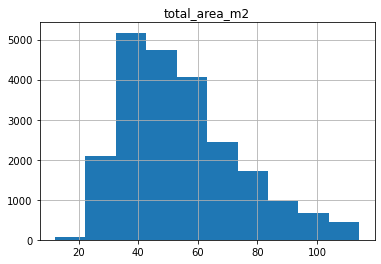

In [108]:
delete_outliers(df,'total_area_m2',1)

In [110]:
delete_outliers(df,'total_area_m2',0)['total_area_m2'].mean()

54.325685084352266

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

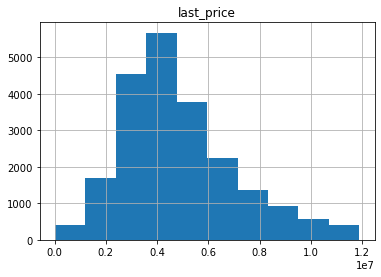

In [111]:
delete_outliers(df,'last_price',1)

In [112]:
delete_outliers(df,'last_price',0)['last_price'].mean()

4838942.090946979

array([[<AxesSubplot:title={'center':'number_of_rooms'}>]], dtype=object)

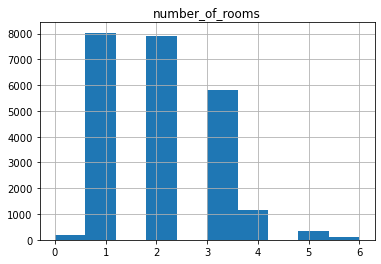

In [113]:
delete_outliers(df,'number_of_rooms',1)

In [114]:
delete_outliers(df,'number_of_rooms',0)['number_of_rooms'].mean()

2.0473259762309

array([[<AxesSubplot:title={'center':'ceiling_height_m'}>]], dtype=object)

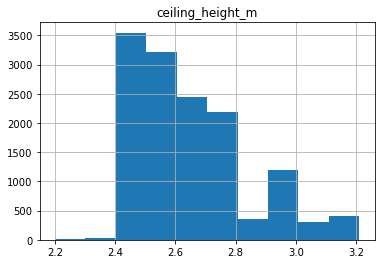

In [115]:
delete_outliers(df,'ceiling_height_m',1)

In [116]:
delete_outliers(df,'ceiling_height_m',0)['ceiling_height_m'].mean()

2.6798572892271135

# Изучение время продажи квартиры

In [122]:
df[['days_exposition']].describe()

,days_exposition
count,"20,470.00"
mean,180.75
std,219.78
min,1.00
25%,45.00
50%,95.00
75%,231.00
max,"1,580.00"


Можно считать, что продажи прошли очень быстро, если они входят в 25%,и необычно долго если больше 75%

Избавимся от выбросов 

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

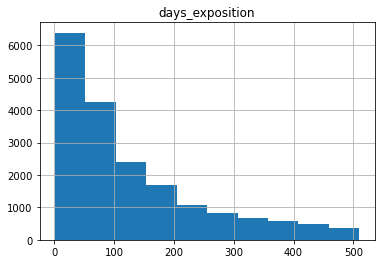

In [123]:
delete_outliers(df,'days_exposition',1)

In [124]:
delete_outliers(df,'days_exposition',0)['days_exposition'].mean()

128.39811662055757

In [125]:
delete_outliers(df,'days_exposition',0)['days_exposition'].std()

121.15367174962599

In [126]:
delete_outliers(df,'days_exposition',0)['days_exposition'].median()

85.0

# Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.


In [127]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,floor_status,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio
0,санкт-петербург,108.00,51.00,25.00,2.70,3,NaN,8,16.00,0,0,0,20,"13,000,000.00",2019-03-07,Thursday,March,2019,NaN,16.03,18.86,1.00,0.48,2.00,0.76,другой,"120,370.37",0.47,0.23
1,поселок шушары,40.40,18.60,11.00,NaN,1,2.00,1,11.00,0,0,0,7,"3,350,000.00",2018-12-04,Tuesday,December,2018,81.00,18.60,12.82,0.00,NaN,0.00,NaN,первый,"82,920.79",0.46,0.27
2,санкт-петербург,56.00,34.30,8.30,NaN,2,0.00,4,5.00,0,0,0,10,"5,196,000.00",2015-08-20,Thursday,August,2015,558.00,13.93,21.74,1.00,0.09,2.00,0.57,другой,"92,785.71",0.61,0.15
3,санкт-петербург,159.00,NaN,NaN,NaN,3,0.00,9,14.00,0,0,0,0,"64,900,000.00",2015-07-24,Friday,July,2015,424.00,6.80,28.10,2.00,0.08,3.00,0.23,другой,"408,176.10",NaN,NaN
4,санкт-петербург,100.00,32.00,41.00,3.03,2,NaN,13,14.00,0,0,0,2,"10,000,000.00",2018-06-19,Tuesday,June,2018,121.00,8.10,31.86,2.00,0.11,1.00,0.05,другой,"100,000.00",0.32,0.41


In [131]:
corr = df[['total_area_m2',\
           'number_of_rooms',\
           'last_price',\
           'days_exposition',\
           'city_center_distance_km']].corr()
corr.style.background_gradient(cmap='coolwarm')

,total_area_m2,number_of_rooms,last_price,days_exposition,city_center_distance_km
total_area_m2,1.000000,0.758745,0.653743,0.149571,-0.231904
number_of_rooms,0.758745,1.000000,0.363421,0.126497,-0.184322
last_price,0.653743,0.363421,1.000000,0.080937,-0.206887
days_exposition,0.149571,0.126497,0.080937,1.000000,-0.059481
city_center_distance_km,-0.231904,-0.184322,-0.206887,-0.059481,1.000000


На стоимость квартиры больше всего зависит общая площадь квартиры (что очевидно)и количество комнат. 
Отрицательная корреляция наблюдается у расстояния от центра.

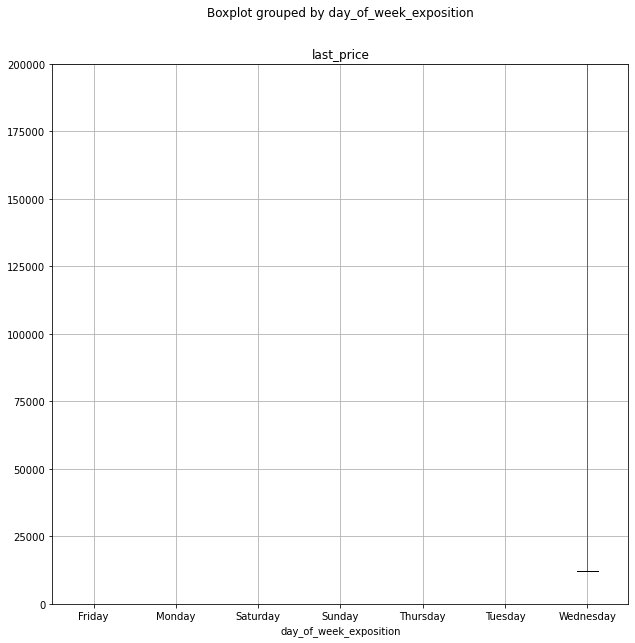

In [132]:
plot = df.boxplot('last_price', by='day_of_week_exposition',figsize=(10,10)).set_ylim(0,200000)


Рассмотрим цену за метр, так как она высчитывается по стоимости квартиры

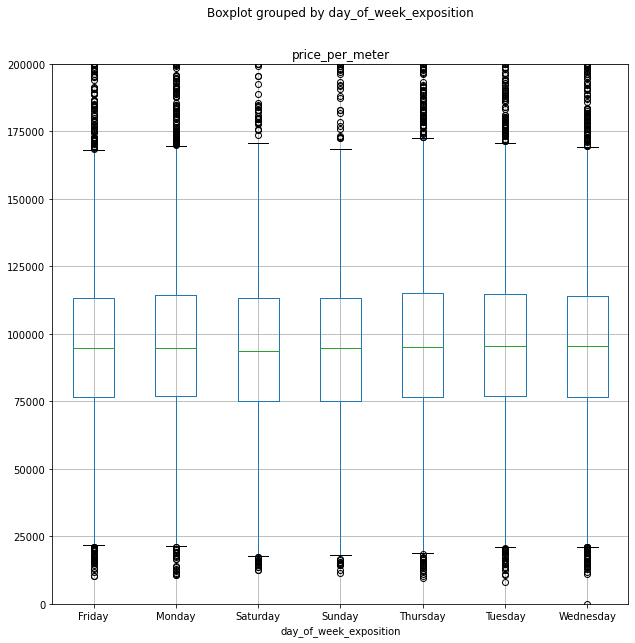

In [135]:
plot = df.boxplot('price_per_meter', by='day_of_week_exposition',figsize=(10,10)).set_ylim(0,200000)


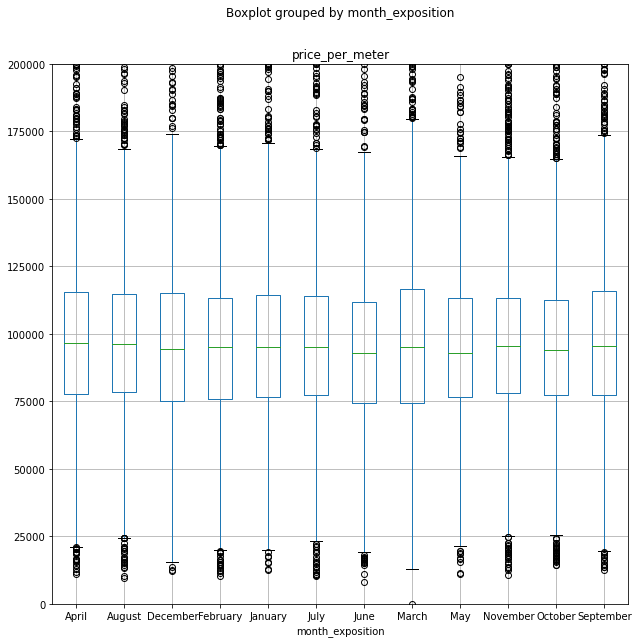

In [136]:
plot = df.boxplot('price_per_meter', by='month_exposition',figsize=(10,10)).set_ylim(0,200000)


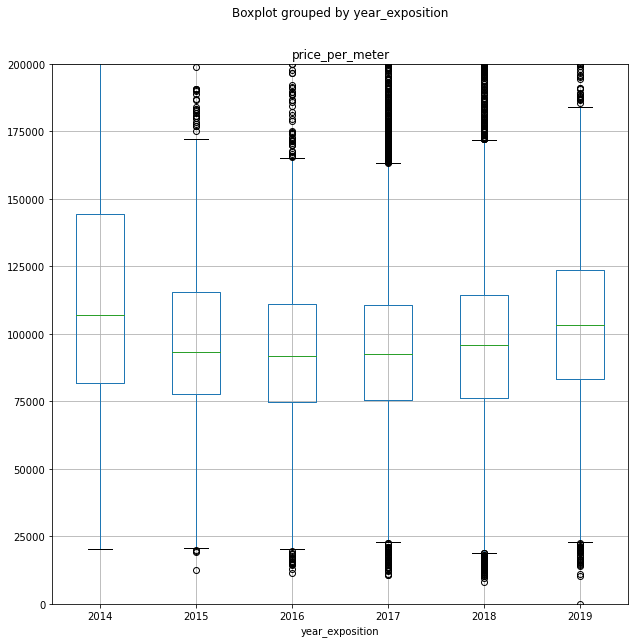

In [137]:
plot = df.boxplot('price_per_meter', by='year_exposition',figsize=(10,10)).set_ylim(0,200000)


(0.0, 200000.0)

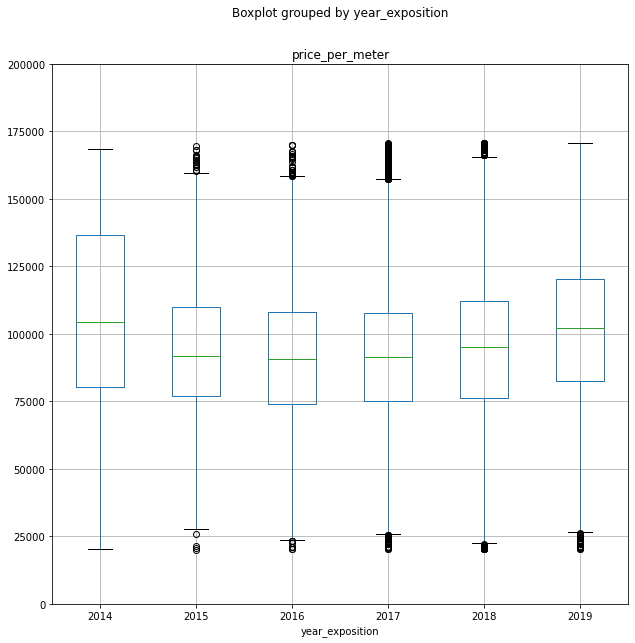

In [138]:
delete_outliers(df,'price_per_meter',0).boxplot('price_per_meter', by='year_exposition',figsize=(10,10)).set_ylim(0,200000)


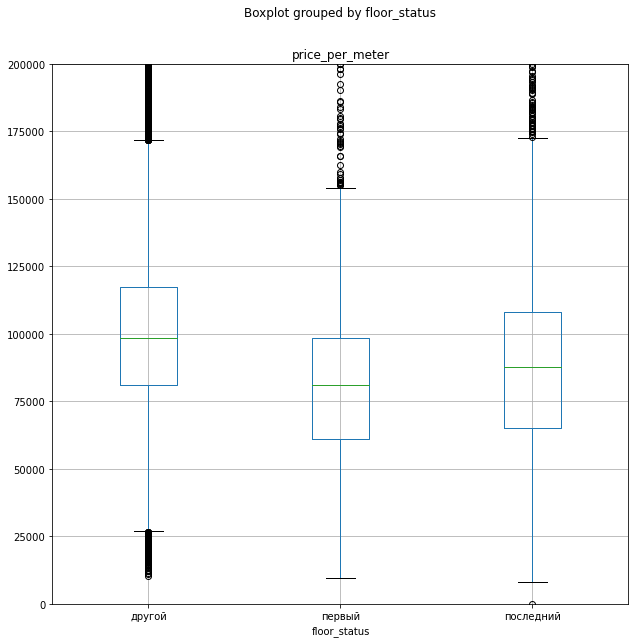

In [141]:
plot = df.boxplot('price_per_meter', by='floor_status',figsize=(10,10)).set_ylim(0,200000)


(0.0, 200000.0)

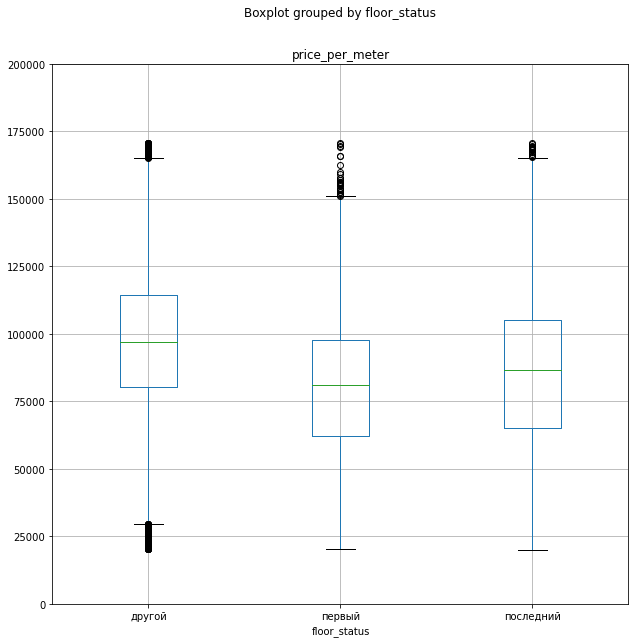

In [142]:
delete_outliers(df,'price_per_meter',0).boxplot('price_per_meter', by='floor_status',figsize=(10,10)).set_ylim(0,200000)


По графикам видно, что первый этаж дешевле всего, потом идет последний и самые другие остальные этажи.

# Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name

In [143]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,floor_status,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio
0,санкт-петербург,108.00,51.00,25.00,2.70,3,NaN,8,16.00,0,0,0,20,"13,000,000.00",2019-03-07,Thursday,March,2019,NaN,16.03,18.86,1.00,0.48,2.00,0.76,другой,"120,370.37",0.47,0.23
1,поселок шушары,40.40,18.60,11.00,NaN,1,2.00,1,11.00,0,0,0,7,"3,350,000.00",2018-12-04,Tuesday,December,2018,81.00,18.60,12.82,0.00,NaN,0.00,NaN,первый,"82,920.79",0.46,0.27
2,санкт-петербург,56.00,34.30,8.30,NaN,2,0.00,4,5.00,0,0,0,10,"5,196,000.00",2015-08-20,Thursday,August,2015,558.00,13.93,21.74,1.00,0.09,2.00,0.57,другой,"92,785.71",0.61,0.15
3,санкт-петербург,159.00,NaN,NaN,NaN,3,0.00,9,14.00,0,0,0,0,"64,900,000.00",2015-07-24,Friday,July,2015,424.00,6.80,28.10,2.00,0.08,3.00,0.23,другой,"408,176.10",NaN,NaN
4,санкт-петербург,100.00,32.00,41.00,3.03,2,NaN,13,14.00,0,0,0,2,"10,000,000.00",2018-06-19,Tuesday,June,2018,121.00,8.10,31.86,2.00,0.11,1.00,0.05,другой,"100,000.00",0.32,0.41


In [144]:
(df['town_name'].value_counts() / df.shape[0] * 100).head(11)

санкт-петербург     66.47
поселок мурино       2.35
поселок шушары       1.86
всеволожск           1.68
пушкин               1.56
колпино              1.43
поселок парголово    1.38
гатчина              1.30
деревня кудрово      1.26
выборг               1.00
петергоф             0.85
Name: town_name, dtype: float64

Питер рассматривать не будет,так как это город

In [145]:
df.groupby('town_name').agg({'price_per_meter':'mean'}).sort_values(by='price_per_meter', ascending=False).head(20)


,price_per_meter
town_name,
зеленогорск,"115,122.80"
санкт-петербург,"114,849.01"
поселок репино,"104,238.61"
пушкин,"103,125.82"
сестрорецк,"101,757.62"
поселок лисий нос,"100,660.82"
кудрово,"100,253.04"
деревня мистолово,"98,549.98"
поселок левашово,"96,997.69"


In [146]:
def town_status(row):
    if row['town_name'] == 'санкт-петербург':
        return 'Питер'
    else:
        return 'За Питером'

In [147]:
df['town_status'] = df.apply(town_status, axis=1)

In [148]:
df.groupby('town_status').agg({'price_per_meter':'mean'}).sort_values(by='price_per_meter')


,price_per_meter
town_status,
За Питером,"68,865.10"
Питер,"114,849.01"


In [149]:
df.groupby('town_status').agg({'price_per_meter':'median'}).sort_values(by='price_per_meter')


,price_per_meter
town_status,
За Питером,"68,728.52"
Питер,"104,761.90"


(0.0, 200000.0)

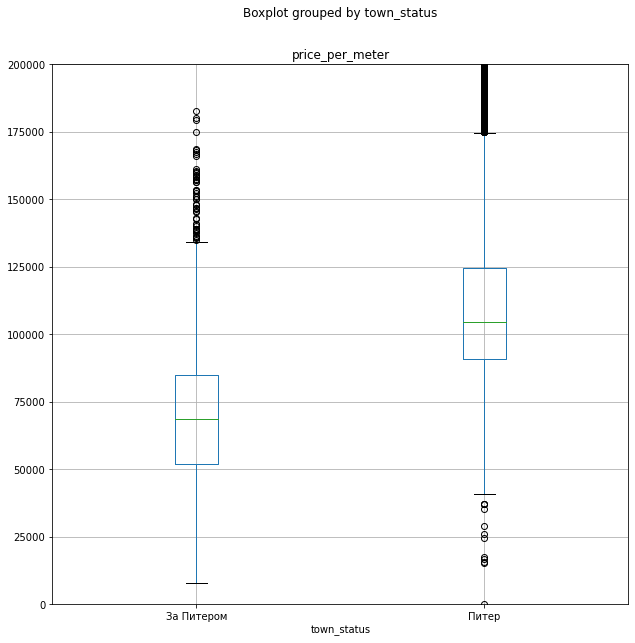

In [150]:
plot = df.boxplot('price_per_meter', by='town_status', figsize=(10,10))
plot.set_ylim(0,200000)

In [151]:
top_10_df = df.groupby('town_name')\
    .agg({'town_status':'count','price_per_meter':'mean'})
top_10_df = top_10_df.sort_values('town_status', ascending=False).head(11)

In [152]:
top_10_df.sort_values('price_per_meter', ascending=False).head(11)


,town_status,price_per_meter
town_name,,
санкт-петербург,15721,"114,849.01"
пушкин,369,"103,125.82"
деревня кудрово,299,"92,473.55"
поселок парголово,327,"90,175.91"
поселок мурино,556,"85,681.76"
петергоф,201,"84,757.56"
поселок шушары,440,"78,677.36"
колпино,338,"75,424.58"
гатчина,307,"68,746.15"


<AxesSubplot:ylabel='town_name'>

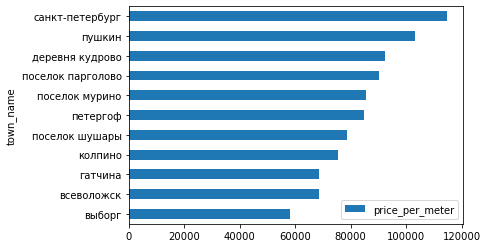

In [153]:
top_10_df.sort_values('price_per_meter', ascending=True)\
    .drop('town_status', axis=1).plot(kind='barh')

In [154]:
(df['town_name'].value_counts() / df.shape[0] * 100).head(11)

санкт-петербург     66.47
поселок мурино       2.35
поселок шушары       1.86
всеволожск           1.68
пушкин               1.56
колпино              1.43
поселок парголово    1.38
гатчина              1.30
деревня кудрово      1.26
выборг               1.00
петергоф             0.85
Name: town_name, dtype: float64

In [155]:
top_10_df.sort_values(by='price_per_meter', ascending=False)

,town_status,price_per_meter
town_name,,
санкт-петербург,15721,"114,849.01"
пушкин,369,"103,125.82"
деревня кудрово,299,"92,473.55"
поселок парголово,327,"90,175.91"
поселок мурино,556,"85,681.76"
петергоф,201,"84,757.56"
поселок шушары,440,"78,677.36"
колпино,338,"75,424.58"
гатчина,307,"68,746.15"


In [156]:
top_10_list = top_10_df.reset_index().town_name.to_list()

In [157]:
top_10_list

['санкт-петербург',
 'поселок мурино',
 'поселок шушары',
 'всеволожск',
 'пушкин',
 'колпино',
 'поселок парголово',
 'гатчина',
 'деревня кудрово',
 'выборг',
 'петергоф']

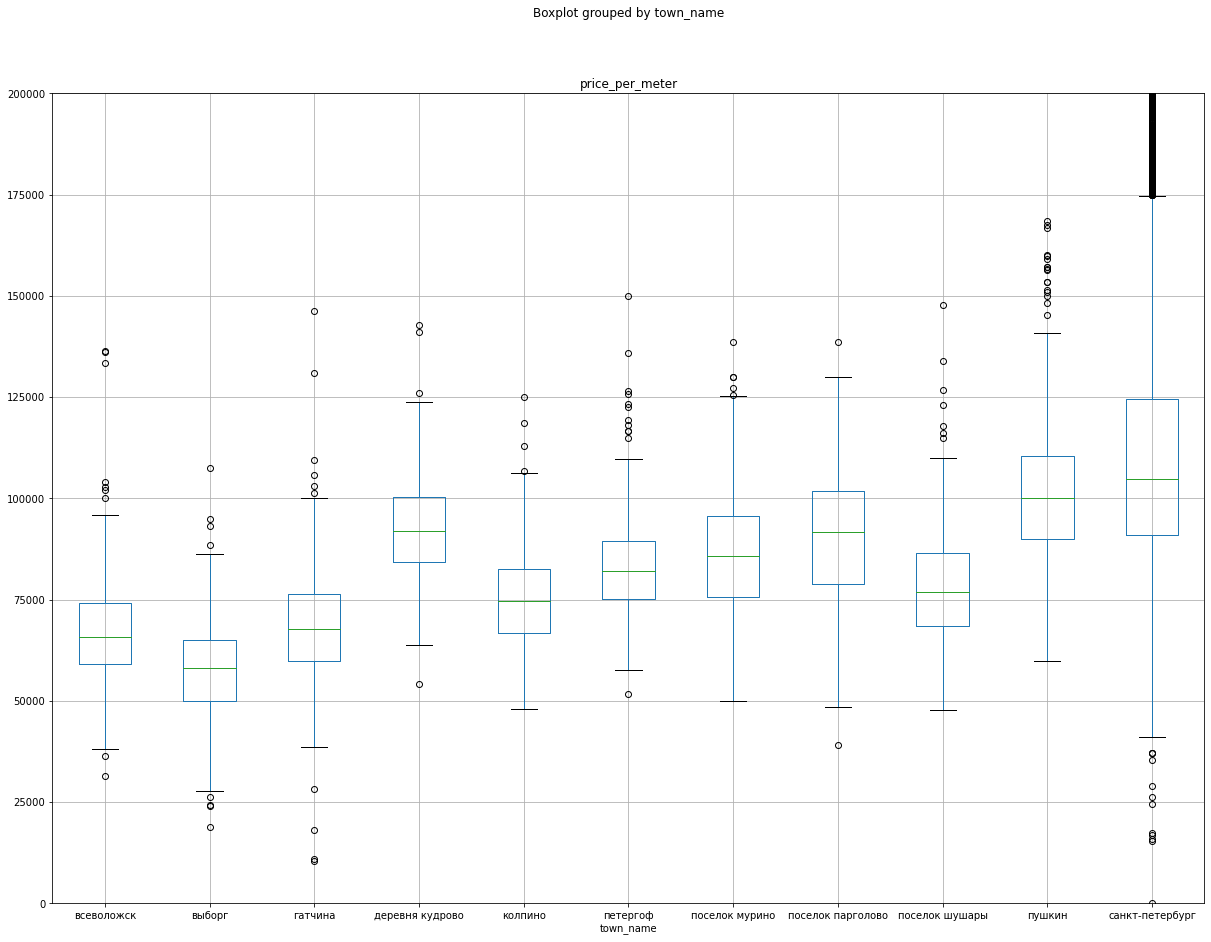

In [158]:
plot = df[df.town_name.isin(top_10_list)]\
    .boxplot('price_per_meter', by='town_name',figsize=(20,15))\
    .set_ylim(0,200000)

По графику мы видим, что в Питере недвижимость самая дорогая. самая дешевая в Выборге

# Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   town_name                    23650 non-null  object        
 1   total_area_m2                23650 non-null  float64       
 2   living_area_m2               21752 non-null  float64       
 3   kitchen_area_m2              21381 non-null  float64       
 4   ceiling_height_m             14490 non-null  float64       
 5   number_of_rooms              23650 non-null  int64         
 6   number_of_balconies          12137 non-null  float64       
 7   floor                        23650 non-null  int64         
 8   total_floors_in_house        23565 non-null  float64       
 9   is_apartment                 23650 non-null  int16         
 10  is_studio                    23650 non-null  int16         
 11  is_open_plan                 23650 non-nu

In [160]:
city_center_df = df.dropna(subset=['city_center_distance_km'])

In [161]:
city_center_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18139 entries, 0 to 23697
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   town_name                    18139 non-null  object        
 1   total_area_m2                18139 non-null  float64       
 2   living_area_m2               16863 non-null  float64       
 3   kitchen_area_m2              16583 non-null  float64       
 4   ceiling_height_m             11548 non-null  float64       
 5   number_of_rooms              18139 non-null  int64         
 6   number_of_balconies          9332 non-null   float64       
 7   floor                        18139 non-null  int64         
 8   total_floors_in_house        18064 non-null  float64       
 9   is_apartment                 18139 non-null  int16         
 10  is_studio                    18139 non-null  int16         
 11  is_open_plan                 18139 non-nu

Выделим квартиры в центре (радиус 5 км)

In [162]:
city_center_in_5_km_df = city_center_df.query('city_center_distance_km < 5')

In [164]:
city_center_in_5_km_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 24 to 23694
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   town_name                    2066 non-null   object        
 1   total_area_m2                2066 non-null   float64       
 2   living_area_m2               1922 non-null   float64       
 3   kitchen_area_m2              1891 non-null   float64       
 4   ceiling_height_m             1384 non-null   float64       
 5   number_of_rooms              2066 non-null   int64         
 6   number_of_balconies          760 non-null    float64       
 7   floor                        2066 non-null   int64         
 8   total_floors_in_house        2060 non-null   float64       
 9   is_apartment                 2066 non-null   int16         
 10  is_studio                    2066 non-null   int16         
 11  is_open_plan                 2066 non-nul

In [175]:
cor_in_center = city_center_in_5_km_df.corr()\
        .sort_values('last_price', ascending=False)\
        .filter(items = ['last_price'])\
        .reset_index()
cor_in_center.style.background_gradient('coolwarm')

,index,last_price
0,last_price,1.000000
1,price_per_meter,0.805480
2,total_area_m2,0.552062
3,living_area_m2,0.474850
4,kitchen_area_m2,0.442092
5,number_of_rooms,0.268803
6,total_images,0.145620
7,floor,0.132746
8,number_of_balconies,0.125878
9,ponds_number_within_3km,0.098446


In [176]:
city_center_cor = city_center_in_5_km_df.corr()\
        .filter(items = ['number_of_rooms'])\
        .sort_values('number_of_rooms', ascending=False)\
        .reset_index()\
        .rename(columns={'number_of_rooms':'city_center_cor'})

In [177]:
city_center_cor1 = city_center_in_5_km_df.corr()\
        .filter(items = ['city_center_distance_km'])\
        .sort_values('city_center_distance_km', ascending=False)\
        .reset_index()\
        .rename(columns={'city_center_distance_km':'city_center_cor'})

In [178]:
city_center_cor2 = city_center_in_5_km_df.corr()\
        .filter(items = ['year_exposition'])\
        .sort_values('year_exposition', ascending=False)\
        .reset_index()\
        .rename(columns={'year_exposition':'city_center_cor'})

In [1]:
#final_corr = cor_in_center.merge(city_center_cor)
#final_corr = final_corr.merge(city_center_cor1)
#final_corr = final_corr.merge(city_center_cor2)
#final_corr

# Общий вывод

Апартаменты дешевле, чем все остальные квартиры.
Квартиры в центре и в Питере обычно дороже, чем квартиры вне центра и за Питером.
Но не всегда, видимо, присутствуют коттеджные поселки или элитная недвижимость.
Датасет с выбросами и датасет без выбросов дает примерно один и тот же результат, применительно к текущим задачам один: вряд ли важно цена за квадрат 90 или 95 тысяч, это ни на что не влияет.

Рекомендации для площадки объявлений

- Уделить внимание правилам валидации на сервере, чтобы больше не сталкиваться с проблемой отсутствующих значений.
- Продумать сценарий, при котором данные до парков, водоемов, аэропортов будут подтягиваться автоматически.
- Считать расстояние в километрах и целых числах.
- Предупреждать пользователей о возможных некорректных значениях.
